# $(T)\ Two\ Body\ Cases$

## TESTBODY LIMIT REGIME $\quad m_1 \ll m_2$

### TESTBODY LIMIT BOUND

EIH α check $\ \downarrow$

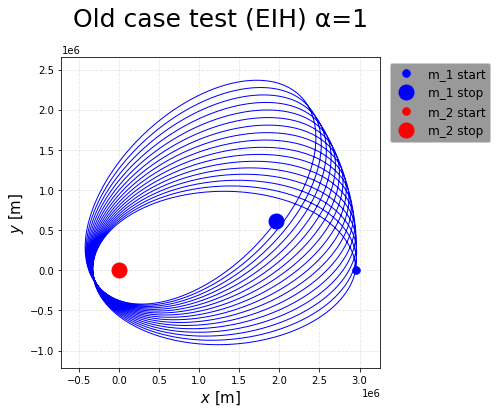

In [2]:
%run ./Functions_EIH.ipynb

m_1 = 1e-4*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000, 0.])*R_S
x_2 = np.array([0.,   0.])*R_S
v_1 = np.array([0., 0.01])*c
v_2 = np.array([0.,    0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

αs = [1]
for i in αs:
    pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2027500*R_S/c, dt=20*R_S/c, mode = 'EIH', α = i)
    # pos1, pos2, pos_CM, parameters, accs = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, EIH=True)
    orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename=f'Old case test (EIH) α={i}', figsize=(7,7), show=True)

# dt STABILIZED at 20*R_S/c
# ~30s

## Checking whether EIH reduces to N
We check by checking whether the parameters of the ellipse of the first round trip in the EIH case mathces the ellipse of the N case.

It should be said that throughout this we assume the following:
1. The motion of the first round trip is an ellipse in both cases.
2. That the line going through the points $(x_1, max(y))$ and $(x_2, min(y))$ is perfectly vertical (that is $x_1 = x_2$).
3. That the line going through the points $(max(x), y_1)$ and $(min(x), y_2)$ is perfectly horizontal (that is $y_1 = y_2$).

We check the semi-major and -minor axis $a$ and $b$ by finding the distances between the points mentioned above

$$a = \frac{|| (x_1, \max(y)) - (x_2, \min(y)) ||}{2},$$

and similarly for the semi-minor axis $b$

$$b = \frac{|| (\max(x), y_1) - (\min(x), y_2) ||}{2}.$$

In [ ]:
%run ./Functions_EIH.ipynb

# CM Bound orbital, faraway starting pos
m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = findR_S(m_1, m_2)

x_1 = np.array([-1000, 0])*R_S
x_2 = np.array([0,     0])*R_S
v_1 = np.array([0,  0.01])*c
v_2 = np.array([0,     0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

pos1N, pos2N, pos_CMN, parameters = run_model(s, t_max = 115000*R_S/c, dt=1*R_S/c, mode = 'N')
parameters[6], parameters[7] = 'X', 'X'
orbPlot1 = orbPlotter(pos1N, pos2N, pos_CMN, parameters, filename = 'Ellipse (N)', show = True)

# # GR bound orbital, faraway starting pos, one round
pos1EIH, pos2EIH, pos_CMEIH, parameters = run_model(s, t_max = 113000*R_S/c, dt=1*R_S/c, mode = 'EIH')
parameters[6], parameters[7] = 'X', 'X'
orbPlot1 = orbPlotter(pos1EIH, pos2EIH, pos_CMEIH, parameters, filename = 'Ellipse (EIH)', show = True)

# Find the dimensions of the ellipse for both cases
δxN = np.abs(max(pos1N[0]) - min(pos1N[0]))
δyN = np.abs(max(pos1N[1]) - min(pos1N[1]))
δxEIH = np.abs(max(pos1EIH[0]) - min(pos1EIH[0]))
δyEIH = np.abs(max(pos1EIH[1]) - min(pos1EIH[1]))

# Find a & b for N case and normalize wrt. R_S
a_N = max(δxN/2, δyN/2)/R_S
b_N = min(δxN/2, δyN/2)/R_S

# Find a & b for EIH case and normalize wrt. R_S
a_EIH = max(δxEIH/2, δyEIH/2)/R_S
b_EIH = min(δxEIH/2, δyEIH/2)/R_S

# Find how much the differ 
δa = np.abs(a_N - a_EIH)
δb = np.abs(b_N - b_EIH)

print(f'δa = {δa:.5f}, δb = {δb:.5f}')

# ~15s

The results of $\delta a \sim 0.5 \, R_S$ and $\delta b \sim 10 \, R_S$ are tiny compared to the size of the entire ellipse which is of the order $\sim 1000 \, R_S$. We suspect that the magnitude of $\delta b$ compared to $\delta a$ could be caused by the precession of the orbit in GR.

## Checking the precession
First we find the analytical value for the precession angle. The precession in our units is given by
    $$\Delta \phi = \frac{6 \pi G M}{\left( 1 - e^2 \right) a c^2} \quad \longrightarrow \quad \frac{3 \pi}{\left(1 - e^2 \right) \tilde a}$$
where $e = \sqrt{1 - b^2/a^2}$ is the eccentricity of the motion. This formula is calculated from the method of Post-Newtonian corrections, and thus the $\tilde a$ here is actually the $\tilde a$ from the Classical case. Let's take the case from before

In [ ]:
# Taking the parameters of the motion from the CM case above
e = np.sqrt(1 - b_N**2/a_N**2)

# Calculating the analytically predicted value of the precession angle (in radians), and how many times it divides 2π radians.
Δφr = 3*np.pi/( (1 - e**2) * a_N)
angDiv = 2*np.pi/Δφr

Δφa = Δφr*360/(2*np.pi) #Convert to angles
print(f'Δφ (in radians) = {Δφr:.3f}, Δφ (in angles) = {Δφa:.3f}, Circle divisions = {angDiv:.0f}')

Now, to check whether this fits with our numerical model first we generate the GR scenario from the same boundary conditions and let it run for a full 360. Then we compile the distance to the origin at every point along the motion into an array. Then we use a function to find all the local extrema in the distances array. The total number of peaks is then the total number of orbitals in a full 360. We then compare this result to the number of circle divisions from the analytical solution.

In [ ]:
%run ./Functions_EIH.ipynb

# m_1 = 1e-9*M_sun
# m_2 = M_sun

# R_S = findR_S(m_1, m_2)

# x_1 = np.array([-1000, 0])*R_S
# x_2 = np.array([0,     0])*R_S
# v_1 = np.array([0,  0.01])*c
# v_2 = np.array([0,     0])*c

# s = x_1, x_2, v_1, v_2, m_1, m_2

# # GR bound orbital, faraway starting pos, full 360
# pos1EIH, pos2EIH, pos_CMEIH, parametersEIH = run_model(s, t_max = 2e7*R_S/c, dt=0.1*R_S/c, mode = 'EIH')
# parameters[6], parameters[7] = 'X', 'X'

# # dt
# # ~25min

# FullCircData = np.array([pos1EIH[0][0:-1:1000], pos1EIH[1][0:-1:1000], pos2EIH[0][0:-1:1000], pos2EIH[1][0:-1:1000], pos_CMEIH[0][0:-1:1000], pos_CMEIH[1][0:-1:1000]])
# np.savetxt("FullCircData.csv", FullCircData, delimiter=",")

# # dt STABILIZED AT 0.1*R_s/C
# # ~3,5 hours!!!

In [ ]:
FullCircEIHData = np.genfromtxt("FullCircEIHData.csv", delimiter=',')
pos1FC, pos2FC, pos_CMFC = FullCircEIHData[0:2], FullCircEIHData[2:4], FullCircEIHData[4:6]

M = slice(0, int(1159.5*133), 10)
orbPlot1 = orbPlotter(pos1FC[:,M], pos2FC[:,M], pos_CMFC[:,M], parameters, filename = 'Test Body limit full Cirlce better (EIH)', show = True, save = True, figsize=(14,14))

#~5s

In [ ]:
from scipy.signal import argrelextrema

# Compiling the distances at every point of the motion
Ls = np.sqrt(pos1FC[0,M]**2 + pos1FC[1,M]**2)

# Finding the number of peaks in the distances array
peaks = argrelextrema(Ls, np.less)[0]

# Adding one because the last peak is not counted
N = len(peaks)

print(f'The number of peaks in a full 360 is {N}.')
t = range(len(Ls[0:-1]))
fig, ax = plt.subplots(figsize=(15,3))
ax.set_xlim(8e3, 17e3)
ax.plot(t, Ls[0:-1], 'b')

#~1s




This actually fits almost perfectly with the analytically calculated 133 circle divisions.

To check whether the discrepancy in the semi-minor axis $\delta b \sim 10 \,R_S$ is due to the precession of the orbit 

In [ ]:
r0 = 1000

ΔO = np.abs(r0 - a_N)* np.sin(Δφr)
Δb = ΔO/2
print(f'Δb = {Δb}')


___
Mercury-Sun System

In [ ]:
%run ./Functions_EIH.ipynb

m_1 = 0.3301e24
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-69.818e9, 0.])
x_2 = np.array([0.,        0.])
v_1 = np.array([0.,   38.86e3])
v_2 = np.array([0.,         0])


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1e13*R_S/c, dt = 1e9*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Mercury-Sun System', figsize=(9,9), show = True)

# dt STABILIZED at 1e9*R_S/c
# ~10s

___
Icarus-Sun System

In [ ]:
%run ./Functions_EIH.ipynb

m_1 = 0.001e15
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000., 0.])*R_S
x_2 = np.array([-1000.,0.])*R_S
v_1 = np.array([0.,  0.01])*c
v_2 = np.array([0.,     0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000000*R_S/c, dt = 500*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Icarus-Sun System',figsize=(9,9), show = True)



### Test Body limit SCATTERING

In [1]:
%run ./Functions_EIH.ipynb

m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -5e4])
x_2 = np.array([0.,        0])
v_1 = np.array([0.1,       0])*c
v_2 = np.array([0.,        0])*c


leng = 10

θs_N = np.zeros(leng)
Ls_N = np.zeros(leng)
θs_EIH = np.zeros(leng)
Ls_EIH = np.zeros(leng)



for i in range(leng):
    v_1 = np.array([0.1,       0])*c
    v_1 += np.array([0.01*i, 0])*c
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2

    pos1_N, pos2_N, pos_CM_N, parameters_N = run_model(s, t_max = 10000*R_S/c, dt = 1*R_S/c, mode = 'N')
    θs_N[i] = parameters_N[7]
    Ls_N[i] = parameters_N[3]
    pos1_EIH, pos2_EIH, pos_CM_EIH, parameters_EIH = run_model(s, t_max = 10000*R_S/c, dt = 1*R_S/c, mode = 'EIH')
    θs_EIH[i] = parameters_EIH[7]
    Ls_EIH[i] = parameters_EIH[3]

    orbPlotter(pos1_N, pos2_N, pos_CM_N, parameters_N, CM=True, figsize=(10,10), filename='Test Body limit scattering 1 (N)')
    orbPlotter(pos1_EIH, pos2_EIH, pos_CM_EIH, parameters_EIH, CM=True, figsize=(10,10), filename='Test Body limit scattering 1 (EIH)')



# E, p_1_len, p_2_len, L_1_len, L_2_len, R_S, b, θ_ang = parameters

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)



# ~5s

[29979245.8        0. ]


TypeError: accelerationEIH() takes 6 positional arguments but 9 were given

In [ ]:
plt.figure()
plt.plot(Ls_N, θs_N, label='Newtonian'), plt.plot(Ls_EIH, θs_EIH, label='EIH')
plt.xlabel('Angular momentum L [kg m^2/s]')
plt.ylabel('Scattering angle θ [°]')
plt.legend()

In [ ]:
%run ./Functions_EIH.ipynb

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -1e5])
x_2 = np.array([0.,        0])
v_1 = np.array([0.05,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2


leng = 10

θs_N = np.zeros(leng)
Ls_N = np.zeros(leng)
θs_EIH = np.zeros(leng)
Ls_EIH = np.zeros(leng)



for i in range(leng):
    v_1 = np.array([0.05,       0])*c
    v_1 += np.array([0.01*i, 0])*c
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2

    pos1_N, pos2_N, pos_CM_N, parameters_N = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'N')
    θs_N[i] = parameters_N[7]
    Ls_N[i] = parameters_N[3]
    pos1_EIH, pos2_EIH, pos_CM_EIH, parameters_EIH = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'EIH')
    θs_EIH[i] = parameters_EIH[7]
    Ls_EIH[i] = parameters_EIH[3]

    orbPlotter(pos1_N, pos2_N, pos_CM_N, parameters_N, CM=True, figsize=(10,10), filename='Test Body limit scattering 1 (N)')
    orbPlotter(pos1_EIH, pos2_EIH, pos_CM_EIH, parameters_EIH, CM=True, figsize=(10,10), filename='Test Body limit scattering 1 (EIH)')



# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'N')
# orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, figsize=(10,10), filename='Test Body limit scattering 2 (N)')

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'EIH')
# orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, figsize=(10,10), filename='Test Body limit scattering 2 (EIH)')



# lims = np.array([-2e6, 2e6])
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Test Body limit scattering 2')

# dt STABILIZED at dt = 1*R_S/c with t_max = 25000*R_S/c
# ~5s

In [ ]:
print(θs_EIH)
θs_EIH = np.abs(θs_EIH)
print(θs_EIH)

In [ ]:
plt.figure()
plt.plot(Ls_N, θs_N, label='Newtonian'), plt.plot(Ls_EIH, θs_EIH, label='EIH')
plt.xlabel('Angular momentum L [kg m^2/s]')
plt.ylabel('Scattering angle θ [°]')
plt.legend()

___
DatF scattering case

In [ ]:
s3 = [0,10,0.2,-0.25]

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([10.,    0.])*R_S
x_2 = np.array([0.,      0])*R_S
v_1 = np.array([-0.25, 0.2])*c
v_2 = np.array([0.,      0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'DatF')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (DatF)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'N')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (N)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (EIH)')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Test Body limit scattering 1')

# dt STABILIZED at 0.01*R_S/c with t_max = 100*R_S/c
# ~5s

# BLACK HOLE REGIME CHECK $\quad m \sim 10M_\mathrm{sun}$

In [ ]:
%run ./Functions_EIH.ipynb
c = const.c.value
G = const.G.value
M_sun = const.M_sun.value

## SYMMETRY TEST

In [ ]:
%run ./Functions_EIH.ipynb

m_1 = M_sun*10
m_2 = M_sun*10

R_S = findR_S(m_1, m_2)

x_1 = np.array([1e3,  0.0])*R_S
x_2 = np.array([0.0,  0.0])*R_S
v_1 = np.array([0.0, 0.01])*c
v_2 = np.array([0.0,   0.])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e6*R_S/c

pos1, pos2, posCM, parameters = run_model(s, t_max = t_max, dt=t_max/5e5, mode = 'EIH')
# pos1, pos2, posCM, parameters = run_model(s, t_max = 5e3, dt=1, mode = 'EIH')
parameters[6:8] = 0,0
orbPlotter(pos1, pos2, posCM, parameters, CM = True, filename='Black hole symmetry test', figsize=(9,9))

# ~1m

## Checking the Periastron Precession
We'll test whether the periastron precession of the above situation fits with analytical predictions.

We'll be using Robertson's formula for the periastron precession

$$\Delta \varphi = 6 \pi \frac{G(m_1 + m_2)}{a c^2 (1- e^2)} \qquad \longleftrightarrow \qquad \Delta \tilde \varphi = 6 \pi \frac{(\tilde m_1 + \tilde m_2)}{\tilde a (1- e^2)}$$

First we have measure the parameters of the quasi-Newtonian orbits

In [ ]:
pos1t = pos1 - posCM
pos2t = pos2 - posCM
posCMt = np.zeros_like(posCM)

In [ ]:
M = slice(0, int(len(pos1[0])/9))

orbPlotter(pos1t[:,M], pos2t[:,M], posCMt[:,M], parameters, filename='Black hole symmetry test 1 orbit', figsize=(8,8))

Δx = (max(pos1t[0,M]) - min(pos1t[0,M]))/2
Δy = (max(pos1t[1,M]) - min(pos1t[1,M]))/2
a = max(Δx, Δy)
b = min(Δx, Δy)

e = np.sqrt(1 - b**2/a**2)

print(f'a = {a:.1f}', f'b = {b:.1f}', f'e = {e:.3f}')


Our analytical prediction of $\Delta \varphi$ is then

In [ ]:
Δφ_an = 6*np.pi*G*(m_1 + m_2)/(a*c**2*(1-e**2))
print(f'Δφ_an = {Δφ_an:.3f} radians = {(Δφ_an*np.pi/180):.2e} angles')

Now we find the precession of our simulated case

In [ ]:
from scipy.signal import argrelextrema

# Making an array of distances to the center of mass for the first mass over time r_1cm(t)
Ls = np.sqrt(pos1t[0,:]**2 + pos1t[1,:]**2)
t = range(len(Ls))

# Finding the indices of the greatest distance 
maxis = argrelextrema(Ls, np.greater, order=8)[0]

#Finding the acutal distances from 0,0 of the peaks
peakposs = pos1t[:,maxis]
peakdists = np.sqrt(peakposs[0,:]**2 + peakposs[1,:]**2)

#plotting
fig,(ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('|r(t)| and peaks')
ax1.plot(t, Ls, 'b-')
ax1.plot(maxis, peakdists, 'ro', markersize=3)
ax1.set_aspect('0.005')
ax2.set_title('r(t) with peaks')
ax2.plot(pos1t[1], pos1t[0], 'b:', lw=0.5)
ax2.plot(peakposs[1], peakposs[0], 'ro', markersize=3)
ax2.set_xlim(0, 1.3e7)
ax2.set_ylim(2.7e7, 3e7)
ax2.set_aspect('1')

#Finding the distance between each peak (i) and the next (i+1)
dist = np.zeros(len(peakposs[0]))
for i in range(len(peakposs[0]) - 1):
    line = peakposs[:,i] - peakposs[:,i+1]
    d = np.linalg.norm(line)
    dist[i] = d

Δφ_code = np.mean(dist)/np.mean(peakdists)
print(f'Δφ_code = {Δφ_code:.3f} radians = {(Δφ_code*np.pi/180):.2e} angles')

δφ = np.abs(Δφ_an - Δφ_code)
print(f'δφ = {δφ:.3f}')


## BOUND CASE

In [ ]:
m_1 = 3*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000.,  0.])*R_S
x_2 = np.array([-1000., 0.])*R_S
v_1 = np.array([0,   0.01])*c
v_2 = np.array([0.,  0.02])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1000000*R_S/c, dt = 50*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Black hole bound case 1', figsize=(9,9))
# lims = (-2e7, 2e7)
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole bound case 1', figsize=(9,9))

# 1m 22.1s

# BLACK HOLE SCATTERING

In [ ]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-500,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.1,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
# lims = (-2e7, 2e7)
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole scattering 1', figsize=(8,8))

# ~5s

In [ ]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-2e3,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.02,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100000*R_S/c, dt = 1*R_S/c, mode = 'EIH')

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
limss = np.array([(-1e8, 1e8), (-1e7, 1e7), (-1e6, 1e6)])
for i in limss:
    orbPlotter_lims(pos1, pos2, pos_CM, xlim=i, ylim=i, CM=True)

# 9.2s